# EDA 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
jjoo = pd.read_csv("../DATA/jjoo_limpio.csv")


In [19]:
jjoo.head()


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoM,China,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoM,Denmark,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoM,Netherlands,0,0,0,0


In [20]:

jjoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222552 entries, 0 to 222551
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              222552 non-null  int64  
 1   Name            222552 non-null  object 
 2   Sex             222552 non-null  object 
 3   Age             222552 non-null  float64
 4   Height          222552 non-null  float64
 5   Weight          222552 non-null  float64
 6   NOC             222552 non-null  object 
 7   Games           222552 non-null  object 
 8   Year            222552 non-null  int64  
 9   Season          222552 non-null  object 
 10  City            222552 non-null  object 
 11  Sport           222552 non-null  object 
 12  Event           222552 non-null  object 
 13  Medal           222552 non-null  object 
 14  Country         222552 non-null  object 
 15  Has_Medal       222552 non-null  int64  
 16  Team_Event      222552 non-null  int64  
 17  Single_Eve

In [21]:

jjoo.isnull().sum()

ID                0
Name              0
Sex               0
Age               0
Height            0
Weight            0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
Country           0
Has_Medal         0
Team_Event        0
Single_Event      0
Event_Category    0
dtype: int64

# Hipótesis 1-Impacto de las Guerras Mundiales en la participación olímpica
Las Guerras Mundiales tuvieron un impacto significativo en la participación de países y atletas en los Juegos Olímpicos, especialmente en los periodos inmediatamente posteriores a los conflictos.

In [22]:
jjoo.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Country', 'Has_Medal',
       'Team_Event', 'Single_Event', 'Event_Category'],
      dtype='object')

¿Se observa una ruptura en la participación durante las Guerras Mundiales?

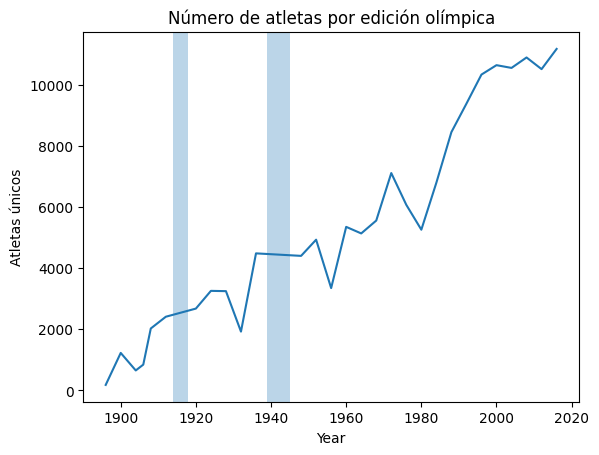

In [23]:
athletes_per_year = jjoo.groupby("Year")["ID"].nunique()

import matplotlib.pyplot as plt

plt.figure()
athletes_per_year.plot()
plt.axvspan(1914, 1918, alpha=0.3)
plt.axvspan(1939, 1945, alpha=0.3)
plt.title("Número de atletas por edición olímpica")
plt.ylabel("Atletas únicos")
plt.show()

El gráfico muestra una tendencia creciente en la participación olímpica a lo largo del tiempo, interrumpida claramente durante los periodos correspondientes a la Primera y Segunda Guerra Mundial. Estas rupturas rompen la tendencia ascendente y evidencian el impacto de los conflictos bélicos en la celebración y escala de los Juegos Olímpicos. La recuperación posterior no es inmediata, lo que sugiere efectos desiguales entre países.

## I Guerra Mundial (análisis por países) PARTICIPACION

¿Qué países reducen más su participación tras la IGM?

In [28]:
before_igm = jjoo[jjoo["Year"] == 1912]
after_igm  = jjoo[jjoo["Year"] == 1920]

ath_1912 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1920 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_igm = (
    pd.concat([ath_1912, ath_1920], axis=1)
    .fillna(0)
)
impact_igm.columns = ["1912", "1920"]
impact_igm["diff"] = impact_igm["1920"] - impact_igm["1912"]

impact_igm.sort_values("diff").head(10)

,1912,1920,diff
Country,,,
Germany,185.0,0.0,-185.0
Sweden,444.0,260.0,-184.0
Russia,159.0,0.0,-159.0
Hungary,121.0,0.0,-121.0
Finland,164.0,63.0,-101.0
Austria,85.0,0.0,-85.0
UK,274.0,234.0,-40.0
Chile,14.0,2.0,-12.0
Australia,25.0,13.0,-12.0


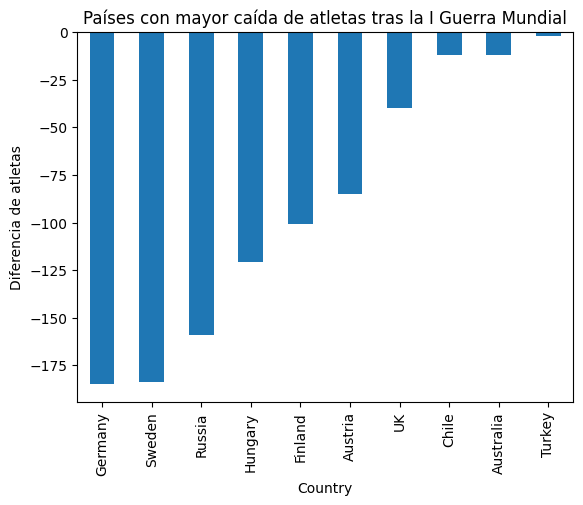

In [29]:
impact_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El análisis por países tras la Primera Guerra Mundial revela un impacto claramente desigual en la participación olímpica. Países europeos como Alemania, Austria, Hungría y Rusia presentan las mayores caídas en el número de atletas entre 1912 y 1920, llegando en algunos casos a no participar en los Juegos posteriores al conflicto. Esta reducción puede explicarse por las consecuencias políticas, económicas y demográficas de la guerra, así como por sanciones y exclusiones en el contexto de posguerra. Por el contrario, países menos afectados directamente por el conflicto muestran descensos más moderados, lo que refuerza la idea de un impacto regionalmente desigual.

## II Guerra Mundial (análisis por países) PARTICIPACION

In [33]:
before_iigm = jjoo[jjoo["Year"] == 1936]
after_iigm  = jjoo[jjoo["Year"] == 1948]

ath_1936 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1948 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_iigm = (
    pd.concat([ath_1936, ath_1948], axis=1)
    .fillna(0)
)
impact_iigm.columns = ["1936", "1948"]
impact_iigm["diff"] = impact_iigm["1948"] - impact_iigm["1936"]

impact_iigm.sort_values("diff").head(10)


,1936,1948,diff
Country,,,
Germany,185.0,0.0,-185.0
Sweden,444.0,260.0,-184.0
Russia,159.0,0.0,-159.0
Hungary,121.0,0.0,-121.0
Finland,164.0,63.0,-101.0
Austria,85.0,0.0,-85.0
UK,274.0,234.0,-40.0
Chile,14.0,2.0,-12.0
Australia,25.0,13.0,-12.0


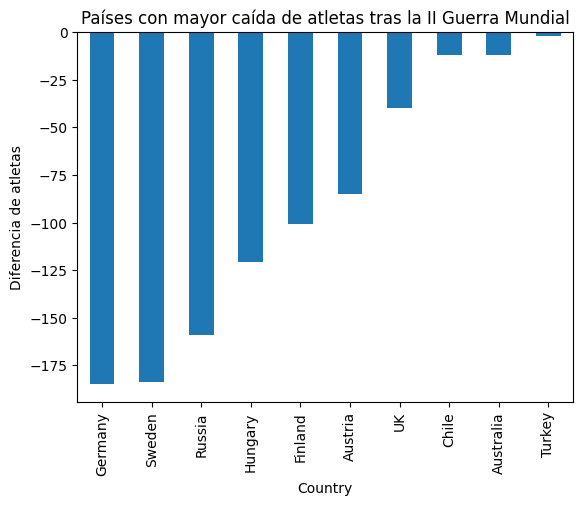

In [35]:
impact_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El gráfico evidencia dos patrones diferenciados en el impacto de la posguerra. Por un lado, países como Alemania, Austria, Hungría o Rusia no registran participación en la edición posterior al conflicto, lo que refleja exclusiones políticas y sanciones internacionales más que una falta de capacidad deportiva. Por otro lado, países como Finlandia o Suecia sí continúan participando, pero mantienen un número de atletas prácticamente idéntico al observado tras la Primera Guerra Mundial, lo que sugiere un comportamiento estructural de reducción de delegaciones en contextos de posguerra. En conjunto, los datos muestran que el impacto de la guerra no solo se manifiesta en la ausencia total de algunos países, sino también en la repetición de patrones de participación reducida en aquellos que sí logran competir.

In [40]:
impact_iigm.sort_values("diff").tail(10)

,1936,1948,diff
Country,,,
Brazil,0.0,19.0,19.0
Greece,22.0,47.0,25.0
Spain,0.0,58.0,58.0
Switzerland,7.0,77.0,70.0
Czech Republic,43.0,119.0,76.0
Netherlands,33.0,130.0,97.0
Italy,66.0,174.0,108.0
USA,174.0,288.0,114.0
France,119.0,304.0,185.0


## Recuperacion tras las guerras en relacion a la participacion del numero de atletas por pais

## Recuperacion tras la Primera Guerra Mundial

In [63]:
recovery_igm = impact_igm[impact_igm["1920"] > 0]

In [64]:
recovery_igm.sort_values("diff", ascending=False).head(10)

,1912,1920,diff
Country,,,
Belgium,36.0,336.0,300.0
France,119.0,304.0,185.0
USA,174.0,288.0,114.0
Italy,66.0,174.0,108.0
Netherlands,33.0,130.0,97.0
Czech Republic,43.0,119.0,76.0
Switzerland,7.0,77.0,70.0
Spain,0.0,58.0,58.0
Greece,22.0,47.0,25.0


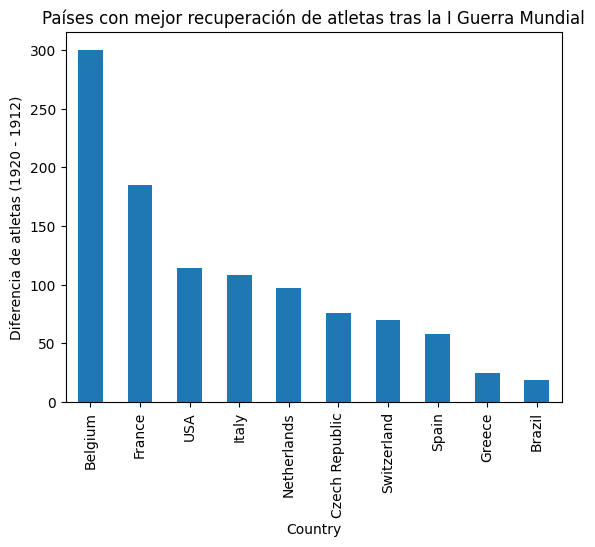

In [65]:
recovery_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas (1920 - 1912)")
plt.show()

Al analizar la recuperación tras la Primera Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1920, se observa que la capacidad de recuperación fue desigual. Algunos países lograron mantener o reducir mínimamente su número de atletas respecto a 1912, mientras que otros sufrieron descensos más acusados. Estos resultados sugieren que, incluso entre los países no sancionados, la recuperación de la participación olímpica estuvo condicionada por factores económicos, organizativos y sociales propios del periodo de posguerra.

## Recuperacion tras Segunda Guerra Mundial

No todos los países parten de las mismas condiciones tras una guerra: algunos fueron excluidos políticamente y no pudieron participar, mientras que otros sí compitieron y, por tanto, pudieron iniciar antes su recuperación deportiva.

In [42]:
recovery_iigm = impact_iigm[impact_iigm["1948"] > 0]

In [43]:
recovery_iigm.sort_values("diff", ascending=False).head(10) #paises con mayor recuperacion

,1936,1948,diff
Country,,,
Belgium,36.0,336.0,300.0
France,119.0,304.0,185.0
USA,174.0,288.0,114.0
Italy,66.0,174.0,108.0
Netherlands,33.0,130.0,97.0
Czech Republic,43.0,119.0,76.0
Switzerland,7.0,77.0,70.0
Spain,0.0,58.0,58.0
Greece,22.0,47.0,25.0


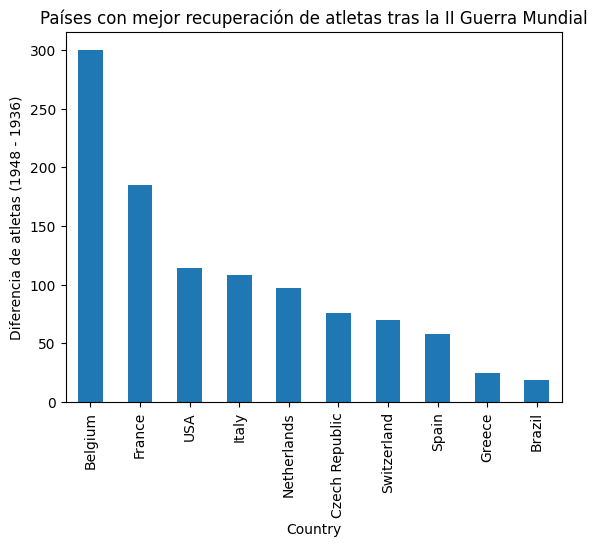

In [44]:
recovery_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas (1948 - 1936)")
plt.show()

Al analizar la recuperación tras la II Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1948, se observa que la recuperación no fue homogénea. Algunos países lograron mantener o incluso aumentar su número de atletas respecto a 1936, lo que sugiere una mayor capacidad de reorganización deportiva y recuperación económica en el periodo de posguerra. En contraste, otros países, aunque no fueron excluidos, muestran una recuperación limitada, reflejando que los efectos del conflicto persistieron más allá del final de la guerra. Este análisis pone de manifiesto que la recuperación olímpica estuvo condicionada tanto por factores políticos como por la situación económica y social de cada país.

# Impacto de las Guerras Mundiales en el número de medallas por país

El análisis de medallas permite evaluar cómo las Guerras Mundiales afectaron no solo a la participación, sino también al rendimiento deportivo de los países, teniendo en cuenta que la ausencia de participación implica automáticamente una pérdida total de medallas.

In [45]:
medals_df = jjoo[jjoo["Medal"] != "NoM"]

## I Guerra Mundial: medallas antes y después (1912 vs 1920)

### Paises perjudicados

In [51]:
medals_1912 = (
    medals_df[medals_df["Year"] == 1912]
    .groupby("Country")["Medal"]
    .count()
)

medals_1920 = (
    medals_df[medals_df["Year"] == 1920]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_igm = (
    pd.concat([medals_1912, medals_1920], axis=1)
    .fillna(0)
)

impact_medals_igm.columns = ["1912", "1920"]
impact_medals_igm["diff"] = impact_medals_igm["1920"] - impact_medals_igm["1912"]

impact_medals_igm.sort_values("diff").head(10)

,1912,1920,diff
Country,,,
UK,170.0,111.0,-59.0
Germany,53.0,0.0,-53.0
Sweden,190.0,154.0,-36.0
Hungary,30.0,0.0,-30.0
Finland,71.0,52.0,-19.0
Denmark,87.0,71.0,-16.0
Austria,14.0,0.0,-14.0
Russia,14.0,0.0,-14.0
Australia,10.0,7.0,-3.0


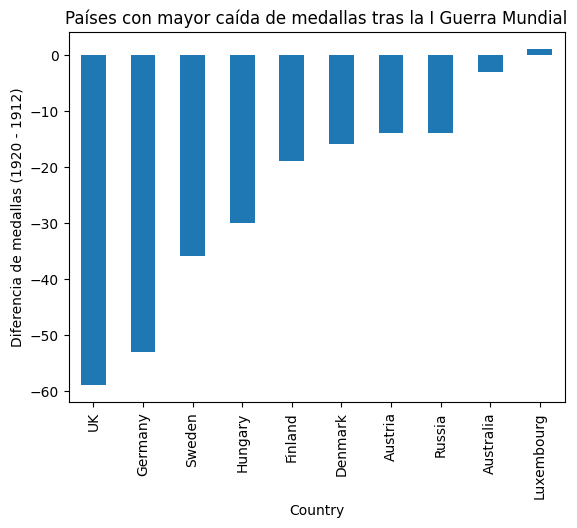

In [52]:
impact_medals_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

### Paises benificiados

In [55]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)

,1912,1920,diff
Country,,,
Belgium,19.0,188.0,169.0
France,26.0,141.0,115.0
USA,107.0,194.0,87.0
Italy,25.0,84.0,59.0
Norway,80.0,137.0,57.0
Switzerland,2.0,29.0,27.0
Netherlands,26.0,50.0,24.0
Spain,0.0,23.0,23.0
South Africa,7.0,21.0,14.0


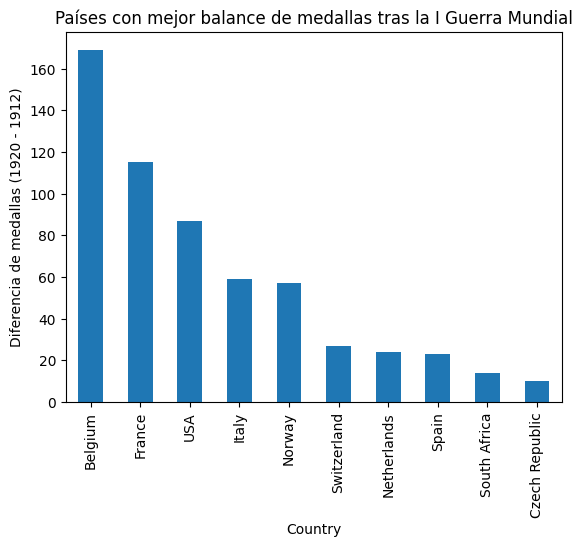

In [56]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

El análisis del número de medallas antes y después de la Primera Guerra Mundial pone de manifiesto un doble efecto del conflicto en el rendimiento olímpico. Por un lado, varios países experimentan una caída muy pronunciada o total en su número de medallas, especialmente aquellos directamente implicados en la guerra o excluidos de los Juegos de 1920, lo que refleja el impacto de las sanciones políticas y las dificultades del periodo de posguerra. Por otro lado, algunos países muestran un aumento o una menor pérdida de medallas, lo que no debe interpretarse únicamente como una mejora deportiva, sino también como consecuencia de la ausencia de competidores históricamente fuertes. En conjunto, los resultados evidencian que la Primera Guerra Mundial no solo perjudicó a determinados países, sino que también alteró el equilibrio competitivo, redistribuyendo el reparto de medallas entre los países participantes.

## II Guerra Mundial: medallas antes y después (1936 vs 1948)

### Paises perjudicados

In [53]:
medals_1936 = (
    medals_df[medals_df["Year"] == 1936]
    .groupby("Country")["Medal"]
    .count()
)

medals_1948 = (
    medals_df[medals_df["Year"] == 1948]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_iigm = (
    pd.concat([medals_1936, medals_1948], axis=1)
    .fillna(0)
)

impact_medals_iigm.columns = ["1936", "1948"]
impact_medals_iigm["diff"] = impact_medals_iigm["1948"] - impact_medals_iigm["1936"]

impact_medals_iigm.sort_values("diff").head(10)

,1936,1948,diff
Country,,,
Germany,224.0,0.0,-224.0
Austria,55.0,8.0,-47.0
Japan,23.0,0.0,-23.0
Switzerland,52.0,36.0,-16.0
Canada,22.0,7.0,-15.0
Poland,12.0,2.0,-10.0
Norway,28.0,18.0,-10.0
Italy,76.0,67.0,-9.0
Mexico,16.0,9.0,-7.0


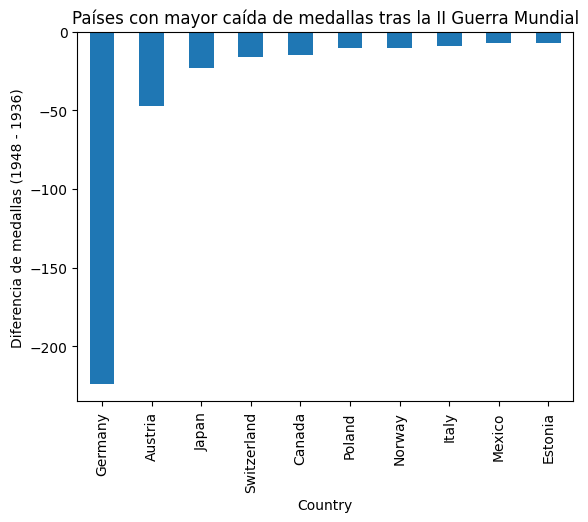

In [54]:
impact_medals_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

### Paises benificiados

In [50]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)

,1936,1948,diff
Country,,,
USA,96.0,152.0,56.0
Denmark,6.0,51.0,45.0
Sweden,35.0,75.0,40.0
France,44.0,72.0,28.0
UK,36.0,61.0,25.0
Hungary,41.0,62.0,21.0
Serbia,1.0,16.0,15.0
Australia,1.0,16.0,15.0
Brazil,0.0,10.0,10.0


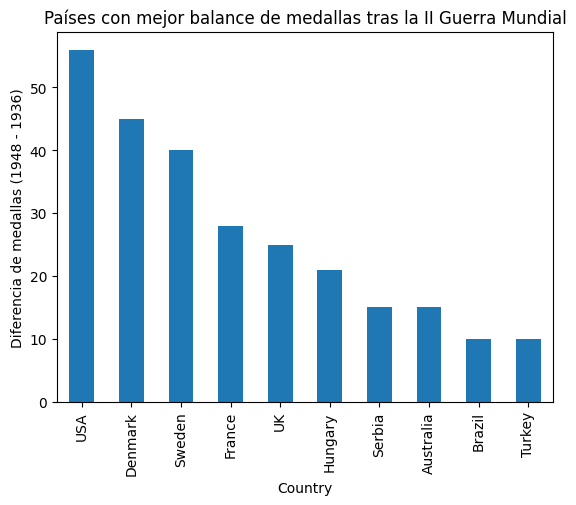

In [57]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

Tras la Segunda Guerra Mundial, el impacto en el número de medallas resulta aún más acusado y generalizado. Numerosos países presentan una pérdida total o muy significativa de medallas debido a su ausencia en los Juegos de 1948, consecuencia directa de sanciones y exclusiones políticas en el contexto de la posguerra. Al mismo tiempo, se observa que algunos países incrementan su número de medallas respecto a 1936, lo que sugiere una redistribución del medallero derivada de una menor competencia internacional. Este fenómeno indica que el conflicto no solo afectó negativamente al rendimiento de los países sancionados, sino que también modificó el balance deportivo global, beneficiando indirectamente a aquellos países que pudieron participar y reorganizarse con mayor rapidez tras la guerra.

Comparando ambos conflictos, se observa que tanto la Primera como la Segunda Guerra Mundial generaron pérdidas significativas de medallas en numerosos países, aunque el impacto de la Segunda Guerra Mundial fue más severo y afectó a un mayor número de países. En ambos casos, las guerras alteraron de forma notable el reparto de medallas, evidenciando que los Juegos Olímpicos reflejan no solo el rendimiento deportivo, sino también las consecuencias de los grandes acontecimientos históricos y políticos

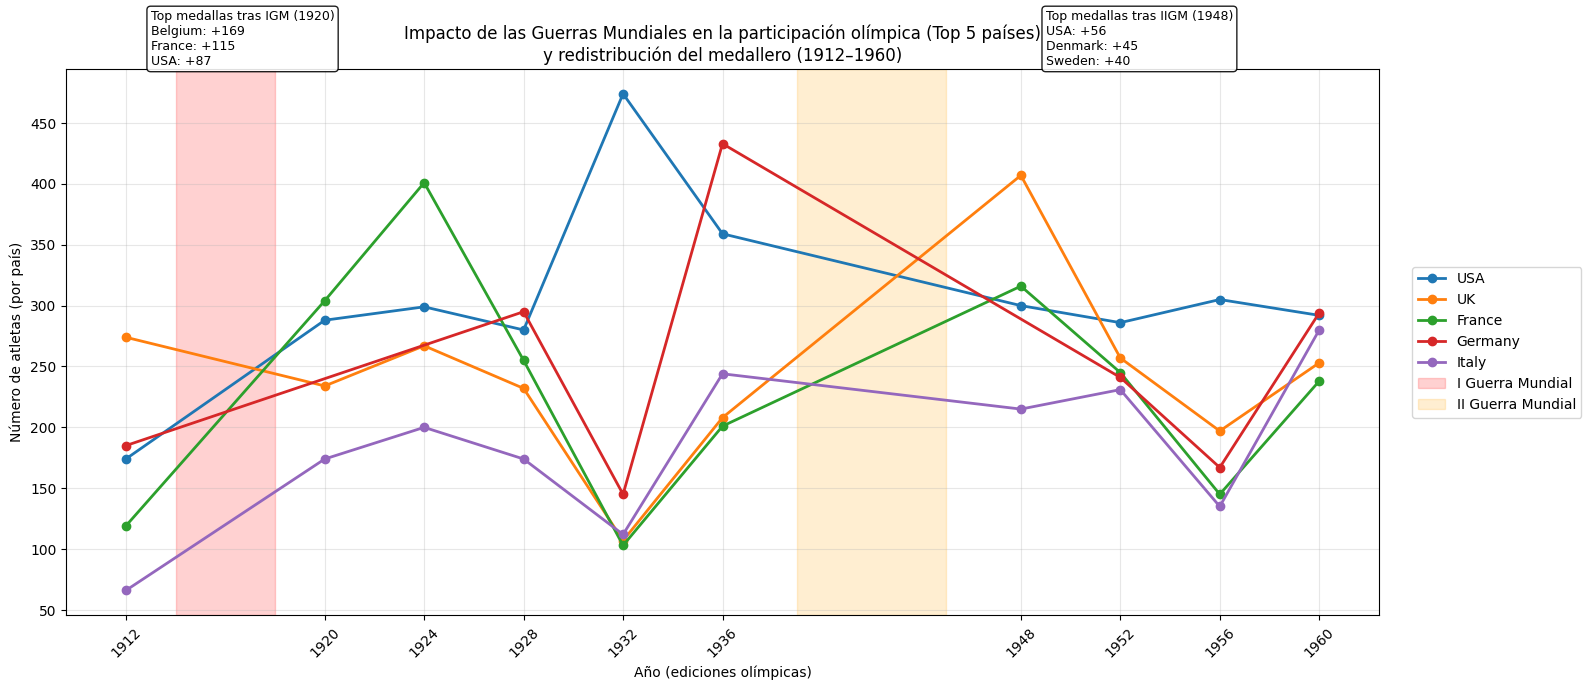

In [78]:
# Periodo de interés
jjoo_period = jjoo[(jjoo["Year"] >= 1912) & (jjoo["Year"] <= 1960)]

# Top 5 países por participación (atletas únicos acumulados en el periodo)
top_countries = (
    jjoo_period
    .groupby("Country")["ID"]
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Serie: atletas por país y año (para las líneas) 
country_year = (
    jjoo_period
    .groupby(["Year", "Country"])["ID"]
    .nunique()
    .reset_index()
)
country_year_top = country_year[country_year["Country"].isin(top_countries)]

# Eje X: años de ediciones olímpicas en el periodo
olympic_years = sorted(jjoo_period["Year"].unique())

plt.figure(figsize=(16, 7))

# Líneas por país (participación) 
for country in top_countries:
    data = country_year_top[country_year_top["Country"] == country]
    plt.plot(
        data["Year"],
        data["ID"],
        marker="o",
        linewidth=2,
        label=country
    )

#  Guerras
plt.axvspan(1914, 1918, color="red", alpha=0.18, label="I Guerra Mundial")
plt.axvspan(1939, 1945, color="orange", alpha=0.18, label="II Guerra Mundial")

#  Medallero:
top_med_igm = impact_medals_igm.sort_values("diff", ascending=False).head(3)
top_med_iigm = impact_medals_iigm.sort_values("diff", ascending=False).head(3)

text_igm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_igm.iterrows()])
text_iigm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_iigm.iterrows()])

# Posición vertical de cajas (arriba del gráfico)
y_top = country_year_top["ID"].max() * 1.05

plt.text(
    1913, y_top,
    f"Top medallas tras IGM (1920)\n{text_igm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)

plt.text(
    1949, y_top,
    f"Top medallas tras IIGM (1948)\n{text_iigm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)


plt.title(
    "Impacto de las Guerras Mundiales en la participación olímpica (Top 5 países)\n"
    "y redistribución del medallero (1912–1960)"
)
plt.xlabel("Año (ediciones olímpicas)")
plt.ylabel("Número de atletas (por país)")
plt.xticks(olympic_years, rotation=45)
plt.grid(alpha=0.3)

# Leyenda fuera para que no tape líneas
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

El gráfico muestra la evolución de la participación olímpica (número de atletas) de los cinco países más participativos entre 1912 y 1960, permitiendo observar caídas, ausencias y recuperaciones diferenciales durante las Guerras Mundiales. Además, se incorpora el “beneficio” en medallas tras cada posguerra (1920 y 1948), lo que evidencia que los conflictos no solo afectan a quién participa, sino también al reparto competitivo: la ausencia o debilitamiento de ciertos países altera el equilibrio del medallero y puede favorecer a otros países en términos de medallas obtenidas.